In [1]:
!pip install astroquery


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from astroquery.gaia import Gaia
import astropy.units as u


In [6]:
query = """
SELECT bp_rp, phot_g_mean_mag, parallax
FROM gaiadr3.gaia_source
WHERE parallax > 3
  AND parallax_over_error > 10
  AND bp_rp IS NOT NULL
  AND phot_g_mean_mag IS NOT NULL
"""
job = Gaia.launch_job_async(query)
data = job.get_results()


INFO: Query finished. [astroquery.utils.tap.core]


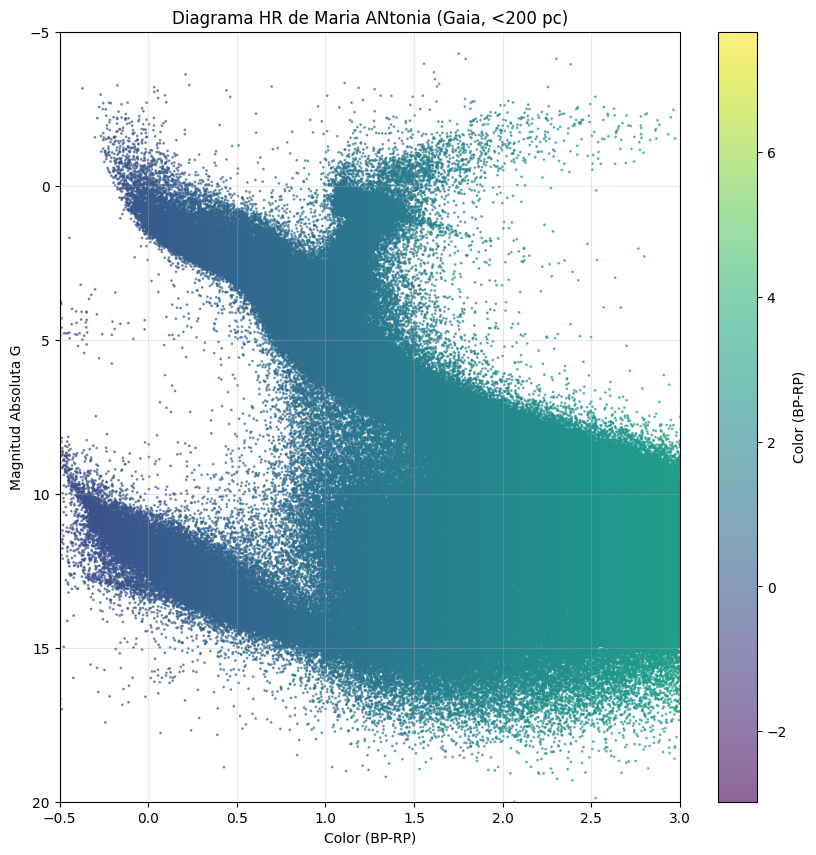

In [4]:
# Filtrar datos
bp_rp = data['bp_rp']
phot_g = data['phot_g_mean_mag']
parallax = data['parallax']  # en milisegundos de arco (mas)

# Magnitud absoluta: M_G = G + 5 * log10(parallax/1000) + 5
M_G = phot_g + 5 * np.log10(parallax / 1000) + 5

# Diagrama HR
plt.figure(figsize=(10, 10))
plt.scatter(bp_rp, M_G, s=1, c=bp_rp, cmap='viridis', alpha=0.6)
plt.colorbar(label='Color (BP-RP)')

plt.gca().invert_yaxis()
plt.xlabel('Color (BP-RP)')
plt.ylabel('Magnitud Absoluta G')
plt.title('Diagrama HR de Maria ANtonia (Gaia, <200 pc)')
plt.grid(alpha=0.3)
plt.xlim(-0.5, 3)
plt.ylim(20, -5)
plt.show()
